<a href="https://colab.research.google.com/github/Jasper-Hewitt/privatestuff/blob/main/ElectionSentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Init

In [1]:
!pip install datasets
!pip install transformers
!pip install --upgrade xlrd
!pip install huggingface_hub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 452 kB 31.8 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 132 kB 6.3 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 212 kB 79.2 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 182 kB 77.2 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 127 kB 75.1 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚

In [2]:
#import our model from huggingface
number_classes = 2
model_tokenizer = "hfl/chinese-roberta-wwm-ext"

if number_classes == 2:
    model_classifier = "Jiabo/Roberta_Chinese_sentiment"
else:
    model_classifier = "owen198/weibo-wmmbert-6"

In [3]:
model_classifier

'Jiabo/Roberta_Chinese_sentiment'

#1 ÈªÉÁèäÁèä

## 1.1 load and clean ÈªÉÁèäÁèä data

In [4]:
#insert new xlsx file here
! wget -nc https://raw.githubusercontent.com/advapplab/sentiment_analysis_election_2022/main/data/jasper/scrap_shanshan.xlsx

--2022-12-21 08:49:29--  https://raw.githubusercontent.com/advapplab/sentiment_analysis_election_2022/main/data/jasper/scrap_shanshan.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 410939 (401K) [application/octet-stream]
Saving to: ‚Äòscrap_shanshan.xlsx‚Äô

scrap_shanshan.xlsx 100%[===================>] 401.31K  --.-KB/s    in 0.003s  

2022-12-21 08:49:30 (144 MB/s) - ‚Äòscrap_shanshan.xlsx‚Äô saved [410939/410939]



In [5]:
import pandas as pd

In [6]:
#insert new xlsx file here
testing_pd = pd.read_excel('/content/scrap_shanshan.xlsx')
testing_pd = testing_pd[['Text']]
testing_pd = testing_pd.rename(columns={'Text':'text'})

In [7]:
#dirty data
testing_pd

text
0     FelixChang Âè∞ÁÅ£Áç®Á´ãÂª∫ÂúãÂøóÈ°òËªç\n@FelixCh29980680\n¬∑\n42m...
1     FelixChang Âè∞ÁÅ£Áç®Á´ãÂª∫ÂúãÂøóÈ°òËªç\n@FelixCh29980680\n¬∑\n1hÂ∞ç...
2     Bruce Kuo\n@kuo1912\n¬∑\n7hReplying to \n@i_don...
3     ËÇØÂ∞º‰∏çÂïÉÊ≥•\n@i_dont_care_004\n¬∑\n8 DecÂñîÊàëÁ¢∫ÂÆöÈÇ£ÂÄãÁî∑ÁöÑÊòØÁôΩÁ≤âÔºåÂõ†...
4     ChenChen\n@Chen57962136\n¬∑\n7 Dec[https://twit...
...                                                 ...
1683  Need a Drink\n@KmtEnemy\n¬∑\n31 OctÊûóÊ¥≤Ê∞ëÂü∫Êú¨‰∏äÊòØÊàëÊúÄË®éÂé≠ÁöÑ...
1684  Âè∞ÁÅ£Êé®Êñ∞ËÅû\n@mytwnews\n¬∑\n31 OctÂóÜËî£Ëê¨ÂÆâÊêû‰∏çÊ∏ÖÂÖßÊπñÁßëÂ≠∏ÂúíÂçÄÁãÄÊ≥Å ÈªÉÁèäÁèä...
1685  ÈÄÜËΩüÈ´òÁÅ∞\n@IloveROCTW\n¬∑\n31 OctReplying to \n@byj...
1686  lemondemon\n@lemondemon\n¬∑\n31 OctËΩâÂôó ‰∏ç‰æÜÊÅ©: Êé•Âà∞ÈõªË©±...
1687  ÁôΩÂ∞èÂÆâ\n@littlewhite2020\n¬∑\n31 OctÈªÉÁèäÁèäÊòØ‰∏çÊòØÂøò‰∫ÜÁèæÂú®ÊòØË™∞ÂùêÂú®...

[1688 rows x 1 columns]

In [8]:
#we can consider not deleting the titles. This will be up to the ICI project group to decide
#if you wish to preserve the titles. replace the corresponding block of code below with this one 

#testing_pd['text'] = testing_pd['text'].replace(span_pattern,'',regex=True).replace(span_pattern,'',regex=True)
#testing_pd['text'] = testing_pd['text'].replace(http_pattern,'',regex=True).replace(html_pattern,'',regex=True)
#testing_pd['text'] = testing_pd['text'].replace(image_pattern,'',regex=True)#.replace(title_pattern_1,'',regex=True)
#testing_pd['text'] = testing_pd['text'].replace(link_pattern,'',regex=True).replace(html_pattern,'',regex=True)
##testing_pd['text'] = testing_pd['text'].replace(title_pattern_2,'',regex=True)
#________________________________________________________________________________________________________________________

testing_pd = testing_pd[~testing_pd['text'].str.contains('a href', regex=True)]


import re
html_pattern = "<(?:\"[^\"]*\"['\"]*|'[^']*'['\"]*|[^'\">])+>"
http_pattern = "http\S+"
image_pattern = "<img\s[^>]*?src\s*=\s*['\"]([^'\"]*?)['\"][^>]*?>" 
#title_pattern = "[„Äê|„Ää*„Äë|„Äã]"
title_pattern_1 = "(?=„Äê)(.*)(?<=„Äë)"
title_pattern_2 = "(?=„Ää)(.*)(?<=„Äã)"
link_pattern="ÁΩëÈ°µÈìæÊé•"
span_pattern='<span.*?>(.+?)</span>'
twitter_username='@([A-Za-z0-9_]+)'
letters='[A-z]'
newline_symbols='/\r?\n|\r/'
numbers='[0-9]'

#replace with this block. Do some more research because it looks like some titles are still removed, like index 41
testing_pd['text'] = testing_pd['text'].replace(twitter_username,'',regex=True)
testing_pd['text'] = testing_pd['text'].replace(span_pattern,'',regex=True).replace(span_pattern,'',regex=True)
testing_pd['text'] = testing_pd['text'].replace(http_pattern,'',regex=True).replace(html_pattern,'',regex=True)
testing_pd['text'] = testing_pd['text'].replace(image_pattern,'',regex=True).replace(title_pattern_1,'',regex=True)
testing_pd['text'] = testing_pd['text'].replace(link_pattern,'',regex=True).replace(html_pattern,'',regex=True)
testing_pd['text'] = testing_pd['text'].replace(title_pattern_2,'',regex=True)
testing_pd['text'] = testing_pd['text'].replace(letters,'',regex=True)
testing_pd['text'] = testing_pd['text'].replace(newline_symbols,'',regex=True)
testing_pd['text'] = testing_pd['text'].replace(numbers,'',regex=True)

In [9]:
#delete empty rows
testing_pd = testing_pd[testing_pd['text'].str.len()>2]   
testing_pd = testing_pd[['text']]
testing_pd = testing_pd.reset_index(drop=True)
testing_pd

text
0      Âè∞ÁÅ£Áç®Á´ãÂª∫ÂúãÂøóÈ°òËªç\n\n¬∑\n  \n\nÈÇ£Èô≥ÊôÇ‰∏≠ÂèØ‰ª•ÂéªÊéßÂëäÂë®ÁéâËîªÂïäÔºÅ\n‰ªñÈÄôÊôÇ‰∏çÂëäÔºå‰ªÄ...
1      Âè∞ÁÅ£Áç®Á´ãÂª∫ÂúãÂøóÈ°òËªç\n\n¬∑\nÂ∞çÊâãÁΩµÈô≥ÊôÇ‰∏≠"Ë¨ÄË≤°ÂÆ≥ÂëΩ"Ôºå‰ªñ‰∏çÊèêÂëäÔºõ\nÂ∞çÊâãÊäπÈªëÈô≥ÊôÇ‰∏≠ÂíåÂë®...
2                                 \n\n¬∑\n  \n\nÈªÉÁèäÁèä‰πüÊ≤íÁµêÂ©öÂêß
3     ËÇØÂ∞º‰∏çÂïÉÊ≥•\n\n¬∑\n ÂñîÊàëÁ¢∫ÂÆöÈÇ£ÂÄãÁî∑ÁöÑÊòØÁôΩÁ≤âÔºåÂõ†ÁÇ∫‰ªñÂ∞±ÊòØÂú®ÊàëÈù¢ÂâçÂ∞çÊàëË™™„ÄåÊàëÂ•ΩÂ∏åÊúõÊòØÈªÉÁèäÁèä...
4     \n\n¬∑\n \nÂÆÖÁ•ûË™™ÊïóËÄå‰∏çÊΩ∞\nÈªÉÁèäÁèäÂèäÂè∞ÁÅ£Ê∞ëÁúæÈª®Ë¶ÅÂø´ÈªûÊúâÂêÑÁ®ÆÁ§æÁæ§Á≥ªÁµ±‰∫íÂãï\n\nÊÑüÊÉ≥...
...                                                 ...
1683    \n\n¬∑\n ÊûóÊ¥≤Ê∞ëÂü∫Êú¨‰∏äÊòØÊàëÊúÄË®éÂé≠ÁöÑ‰∫∫‰πã‰∏ÄÔºå‰ΩÜÂè™Ë¶ÅÂïèÂ∞çÂïèÈ°åÔºå‰∏çÊÉ°ÊÑèÊîªÊìäÔºåÊàëÂÄë‰∏çÊòØÈÉΩË¶Å...
1684  Âè∞ÁÅ£Êé®Êñ∞ËÅû\n\n¬∑\n ÂóÜËî£Ëê¨ÂÆâÊêû‰∏çÊ∏ÖÂÖßÊπñÁßëÂ≠∏ÂúíÂçÄÁãÄÊ≥Å ÈªÉÁèäÁèäÔºöÈõ£ÊÄ™ÊîøÁ≠ñÂ∏∏Âá∫Á¨ëË©± - Ëá™Áî±...
1685  ÈÄÜËΩüÈ´òÁÅ∞\n\n¬∑\n   \n\n‰πãÂâçÈªÉÁèäÁèäÂú®ÂåóÂ∏ÇÂ§ßËæ¶Ë¢´ËΩüÔºå‰ΩÜÊòØÂúã‰∏≠Â∞èËæ¶Ê≤íÂïèÈ°åÔºåË¨õÂ•ΩÂ∞±Â•ΩÔºå...
1686  \n\n¬∑\n ËΩâÂôó ‰∏ç‰æÜÊÅ©: Êé•Âà∞ÈõªË©±ÂîØ‰∏ÄÊîØÊåÅÈªÉÁèäÁèä~   ()\n\n \n.\nÊé•Âà∞Èõª...
1687   ÁôΩÂ∞èÂÆâ\n\n¬∑\n ÈªÉÁèäÁèäÊòØ‰∏çÊòØÂøò‰∫ÜÁèæÂú®ÊòØË™∞ÂùêÂú®Âè∞ÂåóÂ∏ÇÊîøÂ∫úÔºüÁèæÂú®ÊòØË¶ÅËá™Â∑±ÁøªË∑üÊñóÂóéÔºü\n\n\n

[1688 rows x 1 columns]

### 1.2.1 Tokenization

In [10]:
from datasets import Dataset, DatasetDict

weibo_dict = {
              'test' : Dataset.from_pandas(testing_pd)}

weibo_ds = DatasetDict(weibo_dict)

In [11]:
from transformers import AutoTokenizer

In [12]:
tokenizer = AutoTokenizer.from_pretrained(model_tokenizer)

Downloading:   0%|          | 0.00/19.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/689 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/110k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/269k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [13]:
def tokenize_function(examples):
    return tokenizer(examples["text"], 
                     padding="max_length", 
                     truncation=True, 
                     max_length=512)

tokenized_datasets = weibo_ds.map(tokenize_function, batched=True)

  0%|          | 0/2 [00:00<?, ?ba/s]

In [14]:
full_test_dataset = tokenized_datasets["test"]

## 1.2 preparing BERT


In [15]:
from transformers import AutoModelForSequenceClassification

# available chinese models: https://github.com/ymcui/Chinese-BERT-wwm

model = AutoModelForSequenceClassification.from_pretrained(model_classifier, 
                                                           num_labels=2)

Downloading:   0%|          | 0.00/958 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/409M [00:00<?, ?B/s]

In [16]:
from datasets import load_metric

metric = load_metric("accuracy")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

<ipython-input-16-e1ee7db0da93>:3: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library ü§ó Evaluate: https://huggingface.co/docs/evaluate
  metric = load_metric("accuracy")


In [17]:
from transformers import Trainer

trainer = Trainer(
    model=model, 
    eval_dataset=full_test_dataset,
    compute_metrics=compute_metrics,
)

In [18]:
import numpy as np

## 1.3 prediction results


In [19]:
pred = trainer.predict(test_dataset=full_test_dataset)

The following columns in the test set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 1688
  Batch size = 8


In [20]:
pred

PredictionOutput(predictions=array([[ 3.6057487, -3.016045 ],
       [ 1.6087757, -0.9003846],
       [ 2.813133 , -2.0091522],
       ...,
       [ 3.2540631, -2.6238778],
       [ 1.5167663, -0.7985944],
       [ 3.4647515, -2.850327 ]], dtype=float32), label_ids=None, metrics={'test_runtime': 57.9047, 'test_samples_per_second': 29.151, 'test_steps_per_second': 3.644})

In [21]:
# logits, labels = pred.predictions
np.argmax(pred.predictions, axis=-1)

array([0, 0, 0, ..., 0, 0, 0])

In [22]:
testing_pd['pred'] = np.argmax(pred.predictions, axis=-1)

In [23]:
#final table. Remember, 0 = negative, 1 = positive
testing_pd

text  pred
0      Âè∞ÁÅ£Áç®Á´ãÂª∫ÂúãÂøóÈ°òËªç\n\n¬∑\n  \n\nÈÇ£Èô≥ÊôÇ‰∏≠ÂèØ‰ª•ÂéªÊéßÂëäÂë®ÁéâËîªÂïäÔºÅ\n‰ªñÈÄôÊôÇ‰∏çÂëäÔºå‰ªÄ...     0
1      Âè∞ÁÅ£Áç®Á´ãÂª∫ÂúãÂøóÈ°òËªç\n\n¬∑\nÂ∞çÊâãÁΩµÈô≥ÊôÇ‰∏≠"Ë¨ÄË≤°ÂÆ≥ÂëΩ"Ôºå‰ªñ‰∏çÊèêÂëäÔºõ\nÂ∞çÊâãÊäπÈªëÈô≥ÊôÇ‰∏≠ÂíåÂë®...     0
2                                 \n\n¬∑\n  \n\nÈªÉÁèäÁèä‰πüÊ≤íÁµêÂ©öÂêß     0
3     ËÇØÂ∞º‰∏çÂïÉÊ≥•\n\n¬∑\n ÂñîÊàëÁ¢∫ÂÆöÈÇ£ÂÄãÁî∑ÁöÑÊòØÁôΩÁ≤âÔºåÂõ†ÁÇ∫‰ªñÂ∞±ÊòØÂú®ÊàëÈù¢ÂâçÂ∞çÊàëË™™„ÄåÊàëÂ•ΩÂ∏åÊúõÊòØÈªÉÁèäÁèä...     1
4     \n\n¬∑\n \nÂÆÖÁ•ûË™™ÊïóËÄå‰∏çÊΩ∞\nÈªÉÁèäÁèäÂèäÂè∞ÁÅ£Ê∞ëÁúæÈª®Ë¶ÅÂø´ÈªûÊúâÂêÑÁ®ÆÁ§æÁæ§Á≥ªÁµ±‰∫íÂãï\n\nÊÑüÊÉ≥...     1
...                                                 ...   ...
1683    \n\n¬∑\n ÊûóÊ¥≤Ê∞ëÂü∫Êú¨‰∏äÊòØÊàëÊúÄË®éÂé≠ÁöÑ‰∫∫‰πã‰∏ÄÔºå‰ΩÜÂè™Ë¶ÅÂïèÂ∞çÂïèÈ°åÔºå‰∏çÊÉ°ÊÑèÊîªÊìäÔºåÊàëÂÄë‰∏çÊòØÈÉΩË¶Å...     0
1684  Âè∞ÁÅ£Êé®Êñ∞ËÅû\n\n¬∑\n ÂóÜËî£Ëê¨ÂÆâÊêû‰∏çÊ∏ÖÂÖßÊπñÁßëÂ≠∏ÂúíÂçÄÁãÄÊ≥Å ÈªÉÁèäÁèäÔºöÈõ£ÊÄ™ÊîøÁ≠ñÂ∏∏Âá∫Á¨ëË©± - Ëá™Áî±...     0
1685  ÈÄÜËΩüÈ´òÁÅ∞\n\n¬∑\n   \n\n‰πãÂâçÈªÉÁèäÁèäÂú®ÂåóÂ∏ÇÂ§ßËæ¶Ë¢´ËΩüÔºå‰ΩÜÊòØÂúã‰∏≠Â∞èËæ¶Ê≤íÂïèÈ°åÔºåË¨õÂ•ΩÂ∞±Â•ΩÔºå...     0
1686  \n\n¬∑\n ËΩâÂôó ‰∏ç‰æÜÊÅ©: Êé•Âà∞ÈõªË©±ÂîØ‰∏ÄÊîØÊåÅÈªÉÁèäÁèä~   ()\n\n \n.\nÊé•Âà∞Èõª...     0
1687   ÁôΩÂ∞èÂÆâ\n\n¬∑\n ÈªÉÁèäÁèäÊòØ‰∏çÊòØÂøò‰∫ÜÁèæÂú®ÊòØË™∞ÂùêÂú®Âè∞ÂåóÂ∏ÇÊîøÂ∫úÔºüÁèæÂú®ÊòØË¶ÅËá™Â∑±ÁøªË∑üÊñóÂóéÔºü\n\n\n     0

[1688 rows x 2 columns]

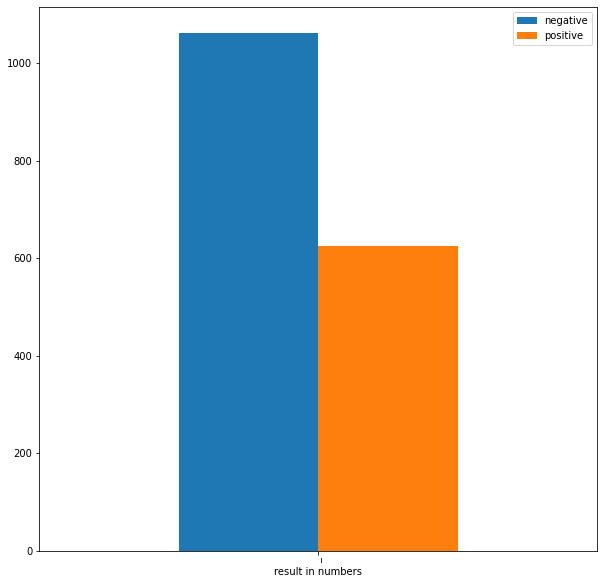

In [24]:
#plot in total amounts. Remember, 0 = negative, 1 = positive
import pandas as pd
import matplotlib.pyplot as plt
count0 = (testing_pd['pred'] == 0).sum()
count1 = (testing_pd['pred'] == 1).sum()
df_plot=pd.DataFrame({'result in numbers': ['_'], 'negative':[count0], 'positive': [count1]})
df_plot.plot.bar(x='result in numbers', figsize=(10, 10))
plt.show()

##1.3.1 piechart

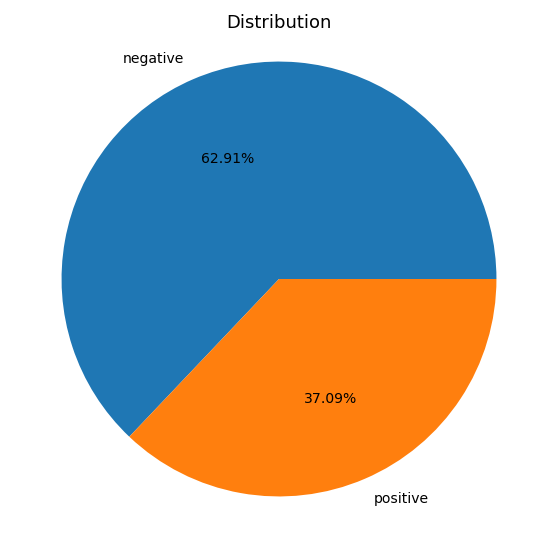

In [25]:
#plot in percentage. Remember, 0 = negative, 1 = positive
def Percentage(num1, num2):
    return num1 / (num1 + num2) * 100

per1=Percentage(count0, count1)
per2=Percentage(count1, count0)

label = ['negative', 'positive']
shares = [per1, per2]
fig, ax = plt.subplots(figsize=(10,10))
ax.pie(shares, labels=label, autopct='%.2f%%', shadow=False, labeldistance=1.1,  textprops={'fontsize': 14})
ax.set_title('Distribution', fontsize=18, y=0.95);

#2 Ëî£Ëê¨ÂÆâ

## 2.1 load and clean Ëî£Ëê¨ÂÆâ data

In [26]:
#insert new xlsx file here
! wget -nc https://raw.githubusercontent.com/advapplab/sentiment_analysis_election_2022/main/data/jasper/scrap_ChiangWanan.xlsx

--2022-12-21 08:51:18--  https://raw.githubusercontent.com/advapplab/sentiment_analysis_election_2022/main/data/jasper/scrap_ChiangWanan.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 323135 (316K) [application/octet-stream]
Saving to: ‚Äòscrap_ChiangWanan.xlsx‚Äô

scrap_ChiangWanan.x 100%[===================>] 315.56K  --.-KB/s    in 0.008s  

2022-12-21 08:51:19 (38.6 MB/s) - ‚Äòscrap_ChiangWanan.xlsx‚Äô saved [323135/323135]



In [27]:
import pandas as pd

In [28]:
#insert new xlsx file here
testing_pd = pd.read_excel('/content/scrap_ChiangWanan.xlsx')
testing_pd = testing_pd[['Text']]
testing_pd = testing_pd.rename(columns={'Text':'text'})

In [29]:
#dirty data
testing_pd

text
0     Âè∞ÁÅ£Êé®Êñ∞ËÅû\n@mytwnews\n¬∑\n51mÁàÜÊñôÂåóÂ∏ÇÂ∫úÂ§ö‰∫∫Áïô‰ªªËî£Ëê¨ÂÆâÂ∞èÂÖßÈñ£ ÊüØÂ§ßÁ¨ëÔºö‰ª£Ë°®...
1     Lu Authority Philosophy\n@archer_taiwan\n¬∑\n1h...
2     ÈâÖÁü≥ÊúÉ\n@GoldenRockTW\n¬∑\n1h‰∏≠ÂÖ±Â∞çÂè∞ÊñáÊîªÊ≠¶ÂöáÔºåËøëÂπ¥ËÆäÊú¨Âä†Âé≤ÂÇôÂèóÂúãÈöõÈóúÊ≥®...
3     Âê≥Â•ïËªç JasonWu\n@jasonbosox\n¬∑\n1h‰∏≠ÂÖ±Â∞çÂè∞ÊñáÊîªÊ≠¶ÂöáÔºåËøëÂπ¥ËÆäÊú¨Âä†Âé≤...
4     Âè∞ÁÅ£Â§ßÂèî\n@XjxjjxDjdjdj\n¬∑\n4hReplying to \n@Felix...
...                                                 ...
1471  Âè∞ÁÅ£Êé®Êñ∞ËÅû\n@mytwnews\n¬∑\n18 NovËóçË≥™ÁñëÊõæËµ¥‰∏≠ÂúãÈÜ´Â≠∏‰∫§ÊµÅ Èô≥ÊôÇ‰∏≠Á´∂Ëæ¶ÔºöËΩâ...
1472  Êùé‰øäË≥¢\n@jimlee32\n¬∑\n18 Nov on \n@YouTube\n: Ëæ≠Á´ãÂßî...
1473  ysj Taiwan\n@tubbysong\n¬∑\n18 NovÈ´òËôπÂÆâÊùéÂø†Â∫≠ÂàóË¢´ÂëäÔºÅÈ´òËôπÂÆâ...
1474  ‰∏âÁ´ãiNEWS\n@inewsknowledge\n¬∑\n18 NovËæ≠Á´ãÂßîÂñäÂñäËÄåÂ∑≤ÔºüËî£Ëê¨ÂÆâ...
1475  Frank\n@FrankDieWelt\n¬∑\n18 NovÈÄôÊòØÂøÖÈ†àÈù¢Â∞çÁöÑÁèæÂØ¶\n\nÊàëÂÄë...

[1476 rows x 1 columns]

In [30]:
#we can consider not deleting the titles. This will be up to the ICI project group to decide
#if you wish to preserve the titles. replace the corresponding block of code below with this one 

#testing_pd['text'] = testing_pd['text'].replace(span_pattern,'',regex=True).replace(span_pattern,'',regex=True)
#testing_pd['text'] = testing_pd['text'].replace(http_pattern,'',regex=True).replace(html_pattern,'',regex=True)
#testing_pd['text'] = testing_pd['text'].replace(image_pattern,'',regex=True)#.replace(title_pattern_1,'',regex=True)
#testing_pd['text'] = testing_pd['text'].replace(link_pattern,'',regex=True).replace(html_pattern,'',regex=True)
##testing_pd['text'] = testing_pd['text'].replace(title_pattern_2,'',regex=True)
#________________________________________________________________________________________________________________________

testing_pd = testing_pd[~testing_pd['text'].str.contains('a href', regex=True)]


import re
html_pattern = "<(?:\"[^\"]*\"['\"]*|'[^']*'['\"]*|[^'\">])+>"
http_pattern = "http\S+"
image_pattern = "<img\s[^>]*?src\s*=\s*['\"]([^'\"]*?)['\"][^>]*?>" 
#title_pattern = "[„Äê|„Ää*„Äë|„Äã]"
title_pattern_1 = "(?=„Äê)(.*)(?<=„Äë)"
title_pattern_2 = "(?=„Ää)(.*)(?<=„Äã)"
link_pattern="ÁΩëÈ°µÈìæÊé•"
span_pattern='<span.*?>(.+?)</span>'
twitter_username='@([A-Za-z0-9_]+)'
letters='[A-z]'
newline_symbols='/\r?\n|\r/'
numbers='[0-9]'

#replace with this block. Do some more research because it looks like some titles are still removed, like index 41
testing_pd['text'] = testing_pd['text'].replace(twitter_username,'',regex=True)
testing_pd['text'] = testing_pd['text'].replace(span_pattern,'',regex=True).replace(span_pattern,'',regex=True)
testing_pd['text'] = testing_pd['text'].replace(http_pattern,'',regex=True).replace(html_pattern,'',regex=True)
testing_pd['text'] = testing_pd['text'].replace(image_pattern,'',regex=True).replace(title_pattern_1,'',regex=True)
testing_pd['text'] = testing_pd['text'].replace(link_pattern,'',regex=True).replace(html_pattern,'',regex=True)
testing_pd['text'] = testing_pd['text'].replace(title_pattern_2,'',regex=True)
testing_pd['text'] = testing_pd['text'].replace(letters,'',regex=True)
testing_pd['text'] = testing_pd['text'].replace(newline_symbols,'',regex=True)
testing_pd['text'] = testing_pd['text'].replace(numbers,'',regex=True)

In [31]:
#delete empty rows
testing_pd = testing_pd[testing_pd['text'].str.len()>2]   
testing_pd = testing_pd[['text']]
testing_pd = testing_pd.reset_index(drop=True)
testing_pd

text
0     Âè∞ÁÅ£Êé®Êñ∞ËÅû\n\n¬∑\nÁàÜÊñôÂåóÂ∏ÇÂ∫úÂ§ö‰∫∫Áïô‰ªªËî£Ëê¨ÂÆâÂ∞èÂÖßÈñ£ ÊüØÂ§ßÁ¨ëÔºö‰ª£Ë°®ÊàëÁöÑÂ±ÄËôïÈï∑Â§™ÂÑ™ÁßÄ - Ëá™...
1                                 \n\n¬∑\nËî£Ëê¨ÂÆâËÅΩÊ∏ÖÊ•ö‰∫ÜÔºÅ\n:\n 
2     ÈâÖÁü≥ÊúÉ\n\n¬∑\n‰∏≠ÂÖ±Â∞çÂè∞ÊñáÊîªÊ≠¶ÂöáÔºåËøëÂπ¥ËÆäÊú¨Âä†Âé≤ÂÇôÂèóÂúãÈöõÈóúÊ≥®ÔºåÂè∞ÁÅ£‰∫∫Êäó‰∏≠‰øùÂè∞ÊòØÂ§©Á∂ìÂú∞Áæ©„ÄÇ\...
3     Âê≥Â•ïËªç \n\n¬∑\n‰∏≠ÂÖ±Â∞çÂè∞ÊñáÊîªÊ≠¶ÂöáÔºåËøëÂπ¥ËÆäÊú¨Âä†Âé≤ÂÇôÂèóÂúãÈöõÈóúÊ≥®ÔºåÂè∞ÁÅ£‰∫∫Êäó‰∏≠‰øùÂè∞ÊòØÂ§©Á∂ìÂú∞Áæ©„ÄÇ...
4     Âè∞ÁÅ£Â§ßÂèî\n\n¬∑\n  \n\nË¶ÅÊ™¢Ë®éÂÄã‰∫∫ÔºåË∂ÅÁèæÂú®ÈÇÑÂèØ‰ª•Ëá™Áî±Ë™™Ë©±ÔºåÂø´ÈªûÂ§ßÂäõÊ™¢Ë®é„ÄÇ\n‰ª•ÂæåÂÖ±...
...                                                 ...
1471  Âè∞ÁÅ£Êé®Êñ∞ËÅû\n\n¬∑\n ËóçË≥™ÁñëÊõæËµ¥‰∏≠ÂúãÈÜ´Â≠∏‰∫§ÊµÅ Èô≥ÊôÇ‰∏≠Á´∂Ëæ¶ÔºöËΩâÁßªËî£Ëê¨ÂÆâÁüΩË∞∑Á∂ìÈ©óÁÑ¶Èªû - Ëá™...
1472  Êùé‰øäË≥¢\n\n¬∑\n   \n\n: Ëæ≠Á´ãÂßîÂñäÂñäËÄåÂ∑≤ÔºüËî£Ëê¨ÂÆâÊãñÂ§©ÊâçÂÆåÊàêËæ≠ËÅ∑ÊâãÁ∫å Ê•ûÂ•ΩÂπæÊãçÊïàÁéá...
1473   \n\n¬∑\n È´òËôπÂÆâÊùéÂø†Â∫≠ÂàóË¢´ÂëäÔºÅÈ´òËôπÂÆâÁ•®Â§™Â§öÂò≤Ë´∑È¶¨Ëã±‰πùÊ≠ª‰∫°‰πãÊè°ÔºüÔºÅÂè∞Á©çÈõªÂ§ßËàâÊäïË≥áÊ£ÑÂè∞Ë´ñ...
1474  ‰∏âÁ´ã\n\n¬∑\n Ëæ≠Á´ãÂßîÂñäÂñäËÄåÂ∑≤ÔºüËî£Ëê¨ÂÆâÊãñÂ§©ÊâçÂÆåÊàêËæ≠ËÅ∑ÊâãÁ∫å Ê•ûÂ•ΩÂπæÊãçÊïàÁéá‰πüÂ§™Â∑ÆÔºÅÂêπÂôìÁüΩË∞∑Á∂ì...
1475  \n\n¬∑\n ÈÄôÊòØÂøÖÈ†àÈù¢Â∞çÁöÑÁèæÂØ¶\n\nÊàëÂÄëÂÖ¨Âè∏ÁöÑ‰∏â‰ª£ÔºàÊ≥®ÊÑèÊòØ‰∏â‰ª£Ôºâ\n\n‰πüË¢´ÊàëÂïèÂà∞ÊâøË™ç...

[1476 rows x 1 columns]

### 2.1.1 Tokenization

In [32]:
from datasets import Dataset, DatasetDict

weibo_dict = {
              'test' : Dataset.from_pandas(testing_pd)}

weibo_ds = DatasetDict(weibo_dict)

In [33]:
from transformers import AutoTokenizer

In [34]:
tokenizer = AutoTokenizer.from_pretrained(model_tokenizer)

loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--hfl--chinese-roberta-wwm-ext/snapshots/5c58d0b8ec1d9014354d691c538661bf00bfdb44/config.json
Model config BertConfig {
  "_name_or_path": "hfl/chinese-roberta-wwm-ext",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "directionality": "bidi",
  "eos_token_id": 2,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "output_past": true,
  "pad_token_id": 0,
  "pooler_fc_size": 768,
  "pooler_num_attention_heads": 12,
  "pooler_num_fc_layers": 3,
  "pooler_size_per_head": 128,
  "pooler_type": "first_token_transform",
  "position_embedding_type": "absolute",
  "transformers_version": "4.25.

In [35]:
def tokenize_function(examples):
    return tokenizer(examples["text"], 
                     padding="max_length", 
                     truncation=True, 
                     max_length=512)

tokenized_datasets = weibo_ds.map(tokenize_function, batched=True)

  0%|          | 0/2 [00:00<?, ?ba/s]

In [36]:
full_test_dataset = tokenized_datasets["test"]

## 2.2 preparing BERT for Ëî£Ëê¨ÂÆâ


In [37]:
from transformers import AutoModelForSequenceClassification

# available chinese models: https://github.com/ymcui/Chinese-BERT-wwm

model = AutoModelForSequenceClassification.from_pretrained(model_classifier, 
                                                           num_labels=2)

loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--Jiabo--Roberta_Chinese_sentiment/snapshots/adbac307def959ebfdcc91ea16713ced4bb36c22/config.json
Model config BertConfig {
  "_name_or_path": "Jiabo/Roberta_Chinese_sentiment",
  "architectures": [
    "BertForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "directionality": "bidi",
  "eos_token_id": 2,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "output_past": true,
  "pad_token_id": 0,
  "pooler_fc_size": 768,
  "pooler_num_attention_heads": 12,
  "pooler_num_fc_layers": 3,
  "pooler_size_per_head": 128,
  "pooler_type": "first_token_transform",
  "position_embedding_type": "absolute",
  "problem

In [38]:
from datasets import load_metric

metric = load_metric("accuracy")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

In [39]:
from transformers import Trainer

trainer = Trainer(
    model=model, 
    eval_dataset=full_test_dataset,
    compute_metrics=compute_metrics,
)

No `TrainingArguments` passed, using `output_dir=tmp_trainer`.
PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).


In [40]:
import numpy as np

## 2.3 prediction results Ëî£Ëê¨ÂÆâ


In [41]:
pred = trainer.predict(test_dataset=full_test_dataset)

The following columns in the test set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 1476
  Batch size = 8


In [42]:
pred

PredictionOutput(predictions=array([[-2.1086917,  1.2203352],
       [-2.2582111,  1.3552265],
       [-2.7559295,  2.0173798],
       ...,
       [ 2.229121 , -1.4934417],
       [ 3.796947 , -3.208681 ],
       [ 2.2763026, -1.5114912]], dtype=float32), label_ids=None, metrics={'test_runtime': 46.2793, 'test_samples_per_second': 31.893, 'test_steps_per_second': 3.997})

In [43]:
# logits, labels = pred.predictions
np.argmax(pred.predictions, axis=-1)

array([1, 1, 1, ..., 0, 0, 0])

In [44]:
testing_pd['pred'] = np.argmax(pred.predictions, axis=-1)

In [45]:
#final table. Remember, 0 = negative, 1 = positive
testing_pd

text  pred
0     Âè∞ÁÅ£Êé®Êñ∞ËÅû\n\n¬∑\nÁàÜÊñôÂåóÂ∏ÇÂ∫úÂ§ö‰∫∫Áïô‰ªªËî£Ëê¨ÂÆâÂ∞èÂÖßÈñ£ ÊüØÂ§ßÁ¨ëÔºö‰ª£Ë°®ÊàëÁöÑÂ±ÄËôïÈï∑Â§™ÂÑ™ÁßÄ - Ëá™...     1
1                                 \n\n¬∑\nËî£Ëê¨ÂÆâËÅΩÊ∏ÖÊ•ö‰∫ÜÔºÅ\n:\n      1
2     ÈâÖÁü≥ÊúÉ\n\n¬∑\n‰∏≠ÂÖ±Â∞çÂè∞ÊñáÊîªÊ≠¶ÂöáÔºåËøëÂπ¥ËÆäÊú¨Âä†Âé≤ÂÇôÂèóÂúãÈöõÈóúÊ≥®ÔºåÂè∞ÁÅ£‰∫∫Êäó‰∏≠‰øùÂè∞ÊòØÂ§©Á∂ìÂú∞Áæ©„ÄÇ\...     1
3     Âê≥Â•ïËªç \n\n¬∑\n‰∏≠ÂÖ±Â∞çÂè∞ÊñáÊîªÊ≠¶ÂöáÔºåËøëÂπ¥ËÆäÊú¨Âä†Âé≤ÂÇôÂèóÂúãÈöõÈóúÊ≥®ÔºåÂè∞ÁÅ£‰∫∫Êäó‰∏≠‰øùÂè∞ÊòØÂ§©Á∂ìÂú∞Áæ©„ÄÇ...     1
4     Âè∞ÁÅ£Â§ßÂèî\n\n¬∑\n  \n\nË¶ÅÊ™¢Ë®éÂÄã‰∫∫ÔºåË∂ÅÁèæÂú®ÈÇÑÂèØ‰ª•Ëá™Áî±Ë™™Ë©±ÔºåÂø´ÈªûÂ§ßÂäõÊ™¢Ë®é„ÄÇ\n‰ª•ÂæåÂÖ±...     0
...                                                 ...   ...
1471  Âè∞ÁÅ£Êé®Êñ∞ËÅû\n\n¬∑\n ËóçË≥™ÁñëÊõæËµ¥‰∏≠ÂúãÈÜ´Â≠∏‰∫§ÊµÅ Èô≥ÊôÇ‰∏≠Á´∂Ëæ¶ÔºöËΩâÁßªËî£Ëê¨ÂÆâÁüΩË∞∑Á∂ìÈ©óÁÑ¶Èªû - Ëá™...     0
1472  Êùé‰øäË≥¢\n\n¬∑\n   \n\n: Ëæ≠Á´ãÂßîÂñäÂñäËÄåÂ∑≤ÔºüËî£Ëê¨ÂÆâÊãñÂ§©ÊâçÂÆåÊàêËæ≠ËÅ∑ÊâãÁ∫å Ê•ûÂ•ΩÂπæÊãçÊïàÁéá...     0
1473   \n\n¬∑\n È´òËôπÂÆâÊùéÂø†Â∫≠ÂàóË¢´ÂëäÔºÅÈ´òËôπÂÆâÁ•®Â§™Â§öÂò≤Ë´∑È¶¨Ëã±‰πùÊ≠ª‰∫°‰πãÊè°ÔºüÔºÅÂè∞Á©çÈõªÂ§ßËàâÊäïË≥áÊ£ÑÂè∞Ë´ñ...     0
1474  ‰∏âÁ´ã\n\n¬∑\n Ëæ≠Á´ãÂßîÂñäÂñäËÄåÂ∑≤ÔºüËî£Ëê¨ÂÆâÊãñÂ§©ÊâçÂÆåÊàêËæ≠ËÅ∑ÊâãÁ∫å Ê•ûÂ•ΩÂπæÊãçÊïàÁéá‰πüÂ§™Â∑ÆÔºÅÂêπÂôìÁüΩË∞∑Á∂ì...     0
1475  \n\n¬∑\n ÈÄôÊòØÂøÖÈ†àÈù¢Â∞çÁöÑÁèæÂØ¶\n\nÊàëÂÄëÂÖ¨Âè∏ÁöÑ‰∏â‰ª£ÔºàÊ≥®ÊÑèÊòØ‰∏â‰ª£Ôºâ\n\n‰πüË¢´ÊàëÂïèÂà∞ÊâøË™ç...     0

[1476 rows x 2 columns]

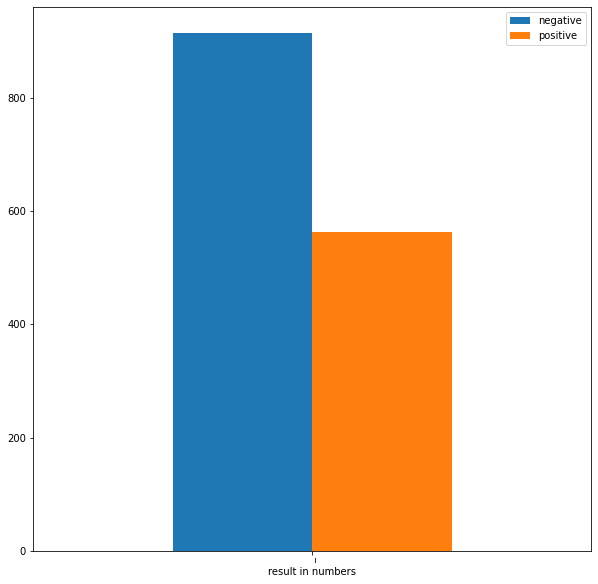

In [46]:
#plot in total amounts. Remember, 0 = negative, 1 = positive
import pandas as pd
import matplotlib.pyplot as plt
count0 = (testing_pd['pred'] == 0).sum()
count1 = (testing_pd['pred'] == 1).sum()
df_plot=pd.DataFrame({'result in numbers': ['_'], 'negative':[count0], 'positive': [count1]})
df_plot.plot.bar(x='result in numbers', figsize=(10, 10))
plt.show()

##2.3.1 piechart

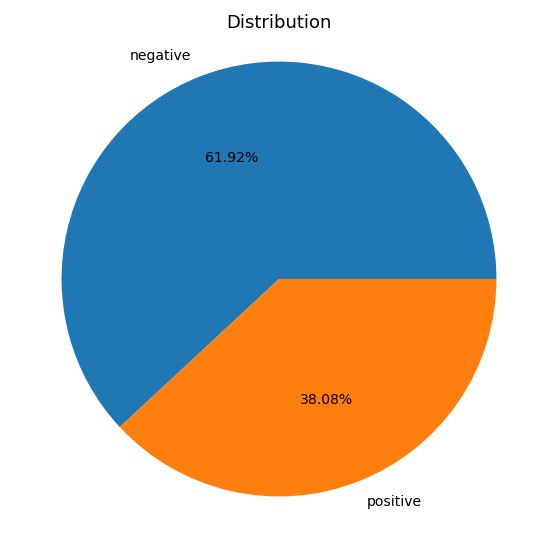

In [47]:
#plot in percentage. Remember, 0 = negative, 1 = positive
def Percentage(num1, num2):
    return num1 / (num1 + num2) * 100

per1=Percentage(count0, count1)
per2=Percentage(count1, count0)

label = ['negative', 'positive']
shares = [per1, per2]
fig, ax = plt.subplots(figsize=(10,10))
ax.pie(shares, labels=label, autopct='%.2f%%', shadow=False, labeldistance=1.1,  textprops={'fontsize': 14})
ax.set_title('Distribution', fontsize=18, y=0.95);

#3 Èô≥ÊôÇ‰∏≠

## 3.1 load and clean data

In [48]:
#insert new xlsx file here
! wget -nc https://raw.githubusercontent.com/advapplab/sentiment_analysis_election_2022/main/data/jasper/scrap_chenshichung.xlsx

--2022-12-21 08:52:12--  https://raw.githubusercontent.com/advapplab/sentiment_analysis_election_2022/main/data/jasper/scrap_chenshichung.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 424461 (415K) [application/octet-stream]
Saving to: ‚Äòscrap_chenshichung.xlsx‚Äô

scrap_chenshichung. 100%[===================>] 414.51K  --.-KB/s    in 0.004s  

2022-12-21 08:52:12 (101 MB/s) - ‚Äòscrap_chenshichung.xlsx‚Äô saved [424461/424461]



In [49]:
import pandas as pd

In [50]:
#insert new xlsx file here
testing_pd = pd.read_excel('/content/scrap_chenshichung.xlsx')
testing_pd = testing_pd[['Text']]
testing_pd = testing_pd.rename(columns={'Text':'text'})

In [51]:
#dirty data
testing_pd

text
0     FelixChang Âè∞ÁÅ£Áç®Á´ãÂª∫ÂúãÂøóÈ°òËªç\n@FelixCh29980680\n¬∑\n11m...
1     Dshunter52 Â∞àËÅ∑Áçµ‰∫∫\n@dshunter52\n¬∑\n36mReplying t...
2     Â§úÂ∑°\n@aazz3738\n¬∑\n1hÈô≥ÊôÇ‰∏≠ÂàùÂÖ•Ê±üÊπñ‰∏çÊ±ÇÂãùÊãõÂçªÊÉ≥ËëóÊ±ÇÊïóÁöÑÂ¢ÉÁïå\nÂ§™Ê∏ÖÈ´òÁöÑ‰∫∫...
3     Romeolucian Popa\n@RomeolucianP\n¬∑\n1hÂê≥ÊÄ°Ëæ≤Èô≥ÊôÇ‰∏≠ÂßöÊñá...
4     Yang Hsun Cheng\n@YShihjung\n¬∑\n1hÈªëÈÅìÊïôÁà∂ÈªÉÊâøÂúãÔºåÊüØÊñáÂì≤Ëî°...
...                                                 ...
1945  È¢®„ÅÆÁøÖËÜÄ\n@philden612\n¬∑\n23 NovÁøªË≠ØÁöÑÂ§™ÂÇ≥Á•û‰∫Ü„ÄÇ\n\n#Ê∞ëÈÄ≤Èª®\n...
1946  Ironforces\n@Ironforces1\n¬∑\n23 NovReplying to...
1947  uno\n@ap323301\n¬∑\n23 NovÊàëÊúâÂÖ©ÂÄãÈ°òÊúõ\nÂè∞ÂåóÂ∏ÇÈô≥ÊôÇ‰∏≠Ë¶ÅË¥è\nÊñ∞Á´πÂ∏Ç...
1948  SirCharles\n@SirCharles1228\n¬∑\n23 NovReplying...
1949  phi\n@pvphy\n¬∑\n23 NovÊë©ÁæØÂ∫ßÊîøÊ≤ª‰∫∫Áâ©ÊúâÈô≥ÊôÇ‰∏≠Ë∑üÈô≥ÂÖ∂ÈÇÅÂ∞±ÂèØ‰ª•‰∫Ü\nÊ¥æÊ¥æËÄ∂...

[1950 rows x 1 columns]

In [52]:
#we can consider not deleting the titles. This will be up to the ICI project group to decide
#if you wish to preserve the titles. replace the corresponding block of code below with this one 

#testing_pd['text'] = testing_pd['text'].replace(span_pattern,'',regex=True).replace(span_pattern,'',regex=True)
#testing_pd['text'] = testing_pd['text'].replace(http_pattern,'',regex=True).replace(html_pattern,'',regex=True)
#testing_pd['text'] = testing_pd['text'].replace(image_pattern,'',regex=True)#.replace(title_pattern_1,'',regex=True)
#testing_pd['text'] = testing_pd['text'].replace(link_pattern,'',regex=True).replace(html_pattern,'',regex=True)
##testing_pd['text'] = testing_pd['text'].replace(title_pattern_2,'',regex=True)
#________________________________________________________________________________________________________________________

testing_pd = testing_pd[~testing_pd['text'].str.contains('a href', regex=True)]


import re
html_pattern = "<(?:\"[^\"]*\"['\"]*|'[^']*'['\"]*|[^'\">])+>"
http_pattern = "http\S+"
image_pattern = "<img\s[^>]*?src\s*=\s*['\"]([^'\"]*?)['\"][^>]*?>" 
#title_pattern = "[„Äê|„Ää*„Äë|„Äã]"
title_pattern_1 = "(?=„Äê)(.*)(?<=„Äë)"
title_pattern_2 = "(?=„Ää)(.*)(?<=„Äã)"
link_pattern="ÁΩëÈ°µÈìæÊé•"
span_pattern='<span.*?>(.+?)</span>'
twitter_username='@([A-Za-z0-9_]+)'
letters='[A-z]'
newline_symbols='/\r?\n|\r/'
numbers='[0-9]'

#replace with this block. Do some more research because it looks like some titles are still removed, like index 41
testing_pd['text'] = testing_pd['text'].replace(twitter_username,'',regex=True)
testing_pd['text'] = testing_pd['text'].replace(span_pattern,'',regex=True).replace(span_pattern,'',regex=True)
testing_pd['text'] = testing_pd['text'].replace(http_pattern,'',regex=True).replace(html_pattern,'',regex=True)
testing_pd['text'] = testing_pd['text'].replace(image_pattern,'',regex=True).replace(title_pattern_1,'',regex=True)
testing_pd['text'] = testing_pd['text'].replace(link_pattern,'',regex=True).replace(html_pattern,'',regex=True)
testing_pd['text'] = testing_pd['text'].replace(title_pattern_2,'',regex=True)
testing_pd['text'] = testing_pd['text'].replace(letters,'',regex=True)
testing_pd['text'] = testing_pd['text'].replace(newline_symbols,'',regex=True)
testing_pd['text'] = testing_pd['text'].replace(numbers,'',regex=True)

In [53]:
#delete empty rows
testing_pd = testing_pd[testing_pd['text'].str.len()>2]   
testing_pd = testing_pd[['text']]
testing_pd = testing_pd.reset_index(drop=True)
testing_pd

text
0      Âè∞ÁÅ£Áç®Á´ãÂª∫ÂúãÂøóÈ°òËªç\n\n¬∑\nÈô≥ÊôÇ‰∏≠ÊïóÈÅ∏Âæå\nÂè™Êâî‰∏ãÊïóÈÅ∏ËÄÖÁöÑÈÄöÁî®Ë™û"ÊòØÊàë‰∏çÂ§†Âä™Âäõ"\nÂ∞±...
1      Â∞àËÅ∑Áçµ‰∫∫\n\n¬∑\n  \n\nÊâÄ‰ª•‰Ω†ÊúâÊääÊè°Â¶ÇÊûúÈô≥ÊôÇ‰∏≠ÊØèÂ§©ÂéªËÅΩÊó©ÊúÉÔºåÂº∑ÂäõÂèçÊìäÂ∞çÊâãÔºåÂ†µÈ∫•ÊôÇ...
2     Â§úÂ∑°\n\n¬∑\nÈô≥ÊôÇ‰∏≠ÂàùÂÖ•Ê±üÊπñ‰∏çÊ±ÇÂãùÊãõÂçªÊÉ≥ËëóÊ±ÇÊïóÁöÑÂ¢ÉÁïå\nÂ§™Ê∏ÖÈ´òÁöÑ‰∫∫ÁúüÁöÑ‰∏çÈÅ©ÂêàÈóñÊ±üÊπñ(ÊîøÊ≤ª...
3      \n\n¬∑\nÂê≥ÊÄ°Ëæ≤Èô≥ÊôÇ‰∏≠ÂßöÊñáÊô∫‰∏âÂêà‰∏Ä Á∂†Â§ßËÄÅÂòÜËî°Ëã±ÊñáÈª®Êú´Êó•ËÜèËÇì Êñ∞ËÅûÂ§ßÁôΩË©±    \n\...
4       \n\n¬∑\nÈªëÈÅìÊïôÁà∂ÈªÉÊâøÂúãÔºåÊüØÊñáÂì≤Ëî°Ëã±ÊñáÂëÇÁßÄËìÆÈô≥ÊôÇ‰∏≠ÂßöÊñáÊô∫ÈªÉÁèäÁèäÈÉΩÂÄöÈáç„ÄÇÂΩ±ÈüøÂè∞ÁÅ£ÊîøÊ≤ªÁöÑ...
...                                                 ...
1945  È¢®„ÅÆÁøÖËÜÄ\n\n¬∑\n ÁøªË≠ØÁöÑÂ§™ÂÇ≥Á•û‰∫Ü„ÄÇ\n\n#Ê∞ëÈÄ≤Èª®\n#Ëî°Ëã±Êñá\n#Èô≥ÊôÇ‰∏≠\n#Ëî°ÈÅ©Êáâ...
1946  \n\n¬∑\n   \n\nÁìúÁ¥öÊú¨‰æÜÂ∞±Â§©Â§©ÁöÑ\nÂ§©ÈæçÁöÑÈÇ£Á®ÆÂ§©\nÊúâÊôÇÂèØ‰ª•‰∏çÁî®Â§™ÁêÜ‰ªñ\n‰ΩÜÊòØ\...
1947  \n\n¬∑\n ÊàëÊúâÂÖ©ÂÄãÈ°òÊúõ\nÂè∞ÂåóÂ∏ÇÈô≥ÊôÇ‰∏≠Ë¶ÅË¥è\nÊñ∞Á´πÂ∏ÇÈ´òËôπÂÆâË¶ÅËº∏\nÈÄôÂÖ©ÂÄãÊ≤íÊúâÂØ¶ÁèæÊàëÊúÉÂ¥©...
1948  \n\n¬∑\n   \n\nÁΩµÊé®ÂèãÂ∞±ÁÆó‰∫ÜÔºåÁúã‰∫ÜÈô≥ÊôÇ‰∏≠ÁöÑË™™Êòé‰ªÄÈ∫ºÈÉΩÊ≤íÂºÑÊáÇÂ∞±‰∫ÇÊâπ‰∏ÄÈÄöÔºåÁúüÁöÑÂá∫‰∏ÄÂºµ...
1949  \n\n¬∑\n Êë©ÁæØÂ∫ßÊîøÊ≤ª‰∫∫Áâ©ÊúâÈô≥ÊôÇ‰∏≠Ë∑üÈô≥ÂÖ∂ÈÇÅÂ∞±ÂèØ‰ª•‰∫Ü\nÊ¥æÊ¥æËÄ∂\n\n¬∑\n \nÊòüÂ∫ßÁúüÁöÑ...

[1950 rows x 1 columns]

### 3.1.2 Tokenization

In [54]:
from datasets import Dataset, DatasetDict

weibo_dict = {
              'test' : Dataset.from_pandas(testing_pd)}

weibo_ds = DatasetDict(weibo_dict)

In [55]:
from transformers import AutoTokenizer

In [56]:
tokenizer = AutoTokenizer.from_pretrained(model_tokenizer)

loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--hfl--chinese-roberta-wwm-ext/snapshots/5c58d0b8ec1d9014354d691c538661bf00bfdb44/config.json
Model config BertConfig {
  "_name_or_path": "hfl/chinese-roberta-wwm-ext",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "directionality": "bidi",
  "eos_token_id": 2,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "output_past": true,
  "pad_token_id": 0,
  "pooler_fc_size": 768,
  "pooler_num_attention_heads": 12,
  "pooler_num_fc_layers": 3,
  "pooler_size_per_head": 128,
  "pooler_type": "first_token_transform",
  "position_embedding_type": "absolute",
  "transformers_version": "4.25.

In [57]:
def tokenize_function(examples):
    return tokenizer(examples["text"], 
                     padding="max_length", 
                     truncation=True, 
                     max_length=512)

tokenized_datasets = weibo_ds.map(tokenize_function, batched=True)

  0%|          | 0/2 [00:00<?, ?ba/s]

In [58]:
full_test_dataset = tokenized_datasets["test"]

## 3.2 preparing BERT


In [59]:
from transformers import AutoModelForSequenceClassification

# available chinese models: https://github.com/ymcui/Chinese-BERT-wwm

model = AutoModelForSequenceClassification.from_pretrained(model_classifier, 
                                                           num_labels=2)

loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--Jiabo--Roberta_Chinese_sentiment/snapshots/adbac307def959ebfdcc91ea16713ced4bb36c22/config.json
Model config BertConfig {
  "_name_or_path": "Jiabo/Roberta_Chinese_sentiment",
  "architectures": [
    "BertForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "directionality": "bidi",
  "eos_token_id": 2,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "output_past": true,
  "pad_token_id": 0,
  "pooler_fc_size": 768,
  "pooler_num_attention_heads": 12,
  "pooler_num_fc_layers": 3,
  "pooler_size_per_head": 128,
  "pooler_type": "first_token_transform",
  "position_embedding_type": "absolute",
  "problem

In [60]:
from datasets import load_metric

metric = load_metric("accuracy")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

In [61]:
from transformers import Trainer

trainer = Trainer(
    model=model, 
    eval_dataset=full_test_dataset,
    compute_metrics=compute_metrics,
)

No `TrainingArguments` passed, using `output_dir=tmp_trainer`.
PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).


In [62]:
import numpy as np

##3.3 prediction results


In [63]:
pred = trainer.predict(test_dataset=full_test_dataset)

The following columns in the test set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 1950
  Batch size = 8


In [64]:
pred

PredictionOutput(predictions=array([[ 3.4589741, -2.9035943],
       [ 2.0306184, -1.2762731],
       [ 3.7206752, -3.1717129],
       ...,
       [ 2.9403117, -2.2355855],
       [ 3.884497 , -3.3252454],
       [-0.954429 ,  0.9170024]], dtype=float32), label_ids=None, metrics={'test_runtime': 61.4905, 'test_samples_per_second': 31.712, 'test_steps_per_second': 3.968})

In [65]:
# logits, labels = pred.predictions
np.argmax(pred.predictions, axis=-1)

array([0, 0, 0, ..., 0, 0, 1])

In [66]:
testing_pd['pred'] = np.argmax(pred.predictions, axis=-1)

In [67]:
#final table. Remember, 0 = negative, 1 = positive
testing_pd

text  pred
0      Âè∞ÁÅ£Áç®Á´ãÂª∫ÂúãÂøóÈ°òËªç\n\n¬∑\nÈô≥ÊôÇ‰∏≠ÊïóÈÅ∏Âæå\nÂè™Êâî‰∏ãÊïóÈÅ∏ËÄÖÁöÑÈÄöÁî®Ë™û"ÊòØÊàë‰∏çÂ§†Âä™Âäõ"\nÂ∞±...     0
1      Â∞àËÅ∑Áçµ‰∫∫\n\n¬∑\n  \n\nÊâÄ‰ª•‰Ω†ÊúâÊääÊè°Â¶ÇÊûúÈô≥ÊôÇ‰∏≠ÊØèÂ§©ÂéªËÅΩÊó©ÊúÉÔºåÂº∑ÂäõÂèçÊìäÂ∞çÊâãÔºåÂ†µÈ∫•ÊôÇ...     0
2     Â§úÂ∑°\n\n¬∑\nÈô≥ÊôÇ‰∏≠ÂàùÂÖ•Ê±üÊπñ‰∏çÊ±ÇÂãùÊãõÂçªÊÉ≥ËëóÊ±ÇÊïóÁöÑÂ¢ÉÁïå\nÂ§™Ê∏ÖÈ´òÁöÑ‰∫∫ÁúüÁöÑ‰∏çÈÅ©ÂêàÈóñÊ±üÊπñ(ÊîøÊ≤ª...     0
3      \n\n¬∑\nÂê≥ÊÄ°Ëæ≤Èô≥ÊôÇ‰∏≠ÂßöÊñáÊô∫‰∏âÂêà‰∏Ä Á∂†Â§ßËÄÅÂòÜËî°Ëã±ÊñáÈª®Êú´Êó•ËÜèËÇì Êñ∞ËÅûÂ§ßÁôΩË©±    \n\...     1
4       \n\n¬∑\nÈªëÈÅìÊïôÁà∂ÈªÉÊâøÂúãÔºåÊüØÊñáÂì≤Ëî°Ëã±ÊñáÂëÇÁßÄËìÆÈô≥ÊôÇ‰∏≠ÂßöÊñáÊô∫ÈªÉÁèäÁèäÈÉΩÂÄöÈáç„ÄÇÂΩ±ÈüøÂè∞ÁÅ£ÊîøÊ≤ªÁöÑ...     1
...                                                 ...   ...
1945  È¢®„ÅÆÁøÖËÜÄ\n\n¬∑\n ÁøªË≠ØÁöÑÂ§™ÂÇ≥Á•û‰∫Ü„ÄÇ\n\n#Ê∞ëÈÄ≤Èª®\n#Ëî°Ëã±Êñá\n#Èô≥ÊôÇ‰∏≠\n#Ëî°ÈÅ©Êáâ...     1
1946  \n\n¬∑\n   \n\nÁìúÁ¥öÊú¨‰æÜÂ∞±Â§©Â§©ÁöÑ\nÂ§©ÈæçÁöÑÈÇ£Á®ÆÂ§©\nÊúâÊôÇÂèØ‰ª•‰∏çÁî®Â§™ÁêÜ‰ªñ\n‰ΩÜÊòØ\...     1
1947  \n\n¬∑\n ÊàëÊúâÂÖ©ÂÄãÈ°òÊúõ\nÂè∞ÂåóÂ∏ÇÈô≥ÊôÇ‰∏≠Ë¶ÅË¥è\nÊñ∞Á´πÂ∏ÇÈ´òËôπÂÆâË¶ÅËº∏\nÈÄôÂÖ©ÂÄãÊ≤íÊúâÂØ¶ÁèæÊàëÊúÉÂ¥©...     0
1948  \n\n¬∑\n   \n\nÁΩµÊé®ÂèãÂ∞±ÁÆó‰∫ÜÔºåÁúã‰∫ÜÈô≥ÊôÇ‰∏≠ÁöÑË™™Êòé‰ªÄÈ∫ºÈÉΩÊ≤íÂºÑÊáÇÂ∞±‰∫ÇÊâπ‰∏ÄÈÄöÔºåÁúüÁöÑÂá∫‰∏ÄÂºµ...     0
1949  \n\n¬∑\n Êë©ÁæØÂ∫ßÊîøÊ≤ª‰∫∫Áâ©ÊúâÈô≥ÊôÇ‰∏≠Ë∑üÈô≥ÂÖ∂ÈÇÅÂ∞±ÂèØ‰ª•‰∫Ü\nÊ¥æÊ¥æËÄ∂\n\n¬∑\n \nÊòüÂ∫ßÁúüÁöÑ...     1

[1950 rows x 2 columns]

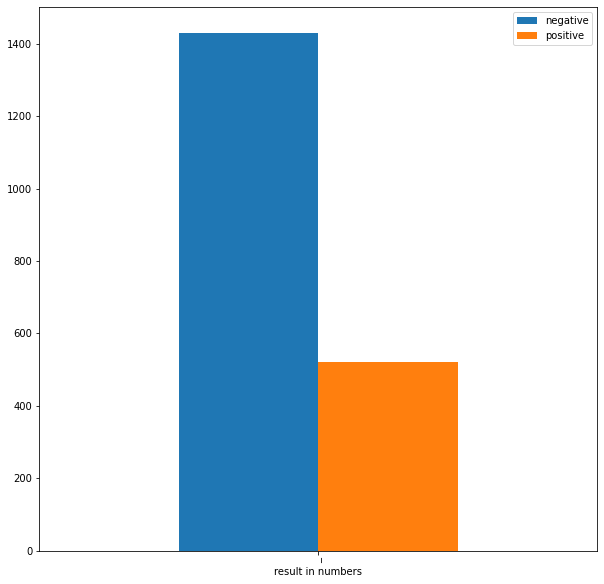

In [68]:
#plot in total amounts. Remember, 0 = negative, 1 = positive
import pandas as pd
import matplotlib.pyplot as plt
count0 = (testing_pd['pred'] == 0).sum()
count1 = (testing_pd['pred'] == 1).sum()
df_plot=pd.DataFrame({'result in numbers': ['_'], 'negative':[count0], 'positive': [count1]})
df_plot.plot.bar(x='result in numbers', figsize=(10, 10))
plt.show()

##3.3.1 piechart

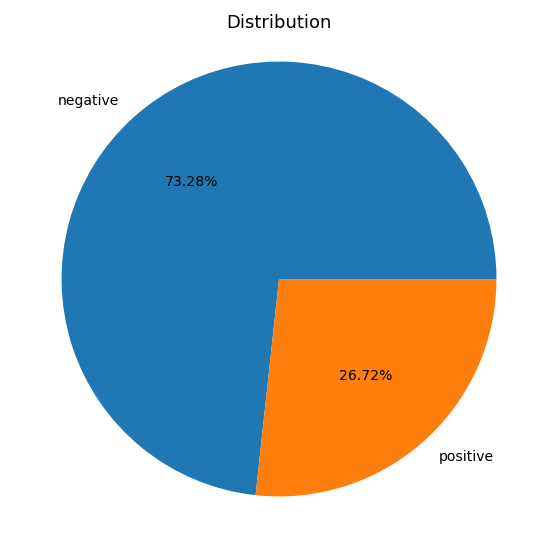

In [70]:
#plot in percentage. Remember, 0 = negative, 1 = positive
def Percentage(num1, num2):
    return num1 / (num1 + num2) * 100

per1=Percentage(count0, count1)
per2=Percentage(count1, count0)

label = ['negative', 'positive']
shares = [per1, per2]
fig, ax = plt.subplots(figsize=(10,10))
ax.pie(shares, labels=label, autopct='%.2f%%', shadow=False, labeldistance=1.1,  textprops={'fontsize': 14})
ax.set_title('Distribution', fontsize=18, y=0.95);

# add bonus È´òËôπÂÆâÔºü

#5 comparison, put charts next to each other